In [36]:
import json
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from models import VAE
from torchviz import make_dot

from optimize_model import full_train

In [26]:
# model_id = '20240213_143925_0008'
model_id = '20240214_055019_0424'
model_dir = '/Users/jonaheaton/Desktop/mskcc_study_feb13/models/{model_id}'.format(model_id=model_id)
pretrained_encoder_load_path =os.path.join(model_dir, 'encoder_model.pth')
pre_trained_output_path = pretrained_encoder_load_path.replace('_model.pth', '_output.json')


In [27]:
# print('using pre-trained model for encoder')    
with open(pre_trained_output_path, 'r') as f:
    pre_trained_output = json.load(f)

In [28]:
pre_trained_output.keys()

dict_keys(['model_name', 'model_kind', 'model_hyperparameters', 'learning_parameters', 'best_val_loss', 'best_epoch', 'end_state_losses', 'end_state_recon_loss', 'loss_history'])

In [31]:
input_size = pre_trained_output['model_hyperparameters']['input_size']
hidden_size = pre_trained_output['model_hyperparameters']['hidden_size']
latent_size = pre_trained_output['model_hyperparameters']['latent_size']
num_hidden_layers = pre_trained_output['model_hyperparameters']['num_hidden_layers']
dropout_rate = pre_trained_output['model_hyperparameters']['dropout_rate']
activation = pre_trained_output['model_hyperparameters']['activation']
use_batch_norm = pre_trained_output['model_hyperparameters']['use_batch_norm']
# act_on_latent_layer = pre_trained_output['model_hyperparameters']['act_on_latent_layer']
act_on_latent_layer = True

encoder_model = VAE(input_size, hidden_size, latent_size, num_hidden_layers, 
                    dropout_rate, activation, use_batch_norm=use_batch_norm,
                    act_on_latent_layer=act_on_latent_layer)


encoder_model.load_state_dict(torch.load(pretrained_encoder_load_path))

<All keys matched successfully>

In [32]:
print(encoder_model)

VAE(
  (encoder): Dense_Layers(
    (network): Sequential(
      (0): Linear(in_features=937, out_features=294, bias=True)
      (output_activation): Sigmoid()
      (output_dropout): Dropout(p=0, inplace=False)
    )
  )
  (decoder): Dense_Layers(
    (network): Sequential(
      (0): Linear(in_features=147, out_features=937, bias=True)
    )
  )
)


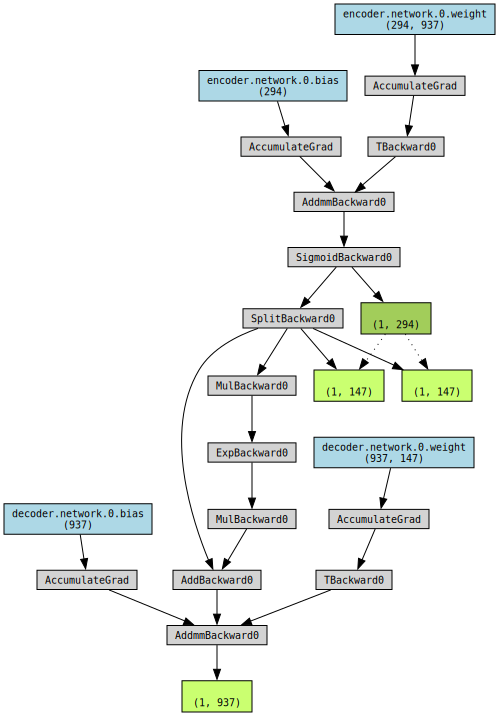

In [33]:
make_dot(encoder_model(torch.rand(1, input_size)), params=dict(encoder_model.named_parameters()))

In [ ]:
example_tensor = torch.zeros((1, 900))

with torch.inference_mode():
    example_output = encoder_model(example_tensor)


In [38]:
data_dir = '/Users/jonaheaton/Desktop/mskcc_study_feb13'
save_dir = '/Users/jonaheaton/Desktop/mskcc_study_feb13/chosen_models'
os.makedirs(save_dir, exist_ok=True)
full_train(data_dir,
           save_dir = save_dir,
           encoder_kind = 'VAE',
           activation = 'sigmoid',
           latent_size = 150,
           encoder_hidden_size_mult = 2.3,
           encoder_hidden_layers = 0,
           encoder_batch_norm = True,
           encoder_act_on_latent = False,
           head_batch_norm = True,
           pretrain_epochs = 800,
           pretrain_early_stopping = 20,
           pretrain_lr = 5e-5,
           pretrain_val_frac = 0.1,
           pretrain_batch_size = 96,
           pretrain_noise_injection = 0.3,
           finetune_dropout = 0.5,
           finetune_epochs = 150,
           finetune_encoder_dropout = 0.1,
           finetune_early_stopping = -1,
           finetune_lr = 1e-5,
           finetune_batch_size = 64,
           finetune_noise_injection = 0.15,
           encoder_name = 'encoder1')

old batch size: 96 new batch size: 94 remainder: 49
use Variational Autoencoder (VAE)
old batch size: 64 new batch size: 53 remainder: 27
Pre-trained model loaded from: /Users/jonaheaton/Desktop/mskcc_study_feb13/chosen_models/encoder1_model.pth
old batch size: 64 new batch size: 52 remainder: 27
Pre-trained model loaded from: /Users/jonaheaton/Desktop/mskcc_study_feb13/chosen_models/encoder1_model.pth
old batch size: 64 new batch size: 52 remainder: 27
Pre-trained model loaded from: /Users/jonaheaton/Desktop/mskcc_study_feb13/chosen_models/encoder1_model.pth
old batch size: 64 new batch size: 52 remainder: 27
Pre-trained model loaded from: /Users/jonaheaton/Desktop/mskcc_study_feb13/chosen_models/encoder1_model.pth
old batch size: 64 new batch size: 52 remainder: 27
Pre-trained model loaded from: /Users/jonaheaton/Desktop/mskcc_study_feb13/chosen_models/encoder1_model.pth


0.9016830682754516

In [42]:
full_train(data_dir,
           save_dir = save_dir,
           encoder_kind = 'VAE',
           activation = 'sigmoid',
           latent_size = 150,
           encoder_hidden_size_mult = 2.3,
           encoder_hidden_layers = 0,
           encoder_batch_norm = True,
           encoder_act_on_latent = False,
           head_batch_norm = True,
           pretrain_epochs = 800,
           pretrain_early_stopping = 20,
           pretrain_lr = 5e-5,
           pretrain_val_frac = 0.1,
           pretrain_batch_size = 96,
           pretrain_noise_injection = 0.3,
           finetune_dropout = 0.5,
           finetune_epochs = 150,
           finetune_encoder_dropout = 0.1,
           finetune_early_stopping = -1,
           finetune_lr = 1e-5,
           finetune_batch_size = 64,
           finetune_noise_injection = 0.15,
           finetune_encoder_status = 'random',
           encoder_name = 'encoder1')

old batch size: 96 new batch size: 94 remainder: 49
use Variational Autoencoder (VAE)
found existing model, loading it
old batch size: 64 new batch size: 53 remainder: 27
Randomly initializing the encoder
old batch size: 64 new batch size: 52 remainder: 27
Randomly initializing the encoder
old batch size: 64 new batch size: 52 remainder: 27
Randomly initializing the encoder
old batch size: 64 new batch size: 52 remainder: 27
Randomly initializing the encoder
old batch size: 64 new batch size: 52 remainder: 27
Randomly initializing the encoder


0.9079039096832275

In [40]:
os.makedirs(save_dir, exist_ok=True)
full_train(data_dir,
           save_dir = save_dir,
           encoder_kind = 'VAE',
           activation = 'sigmoid',
           latent_size = 147,
           encoder_hidden_size_mult = 2.3,
           encoder_hidden_layers = 0,
           encoder_batch_norm = True,
           encoder_act_on_latent = False,
           head_batch_norm = True,
           pretrain_epochs = 811,
           pretrain_early_stopping = 20,
           pretrain_lr = 5.320176227181434e-05,
           pretrain_val_frac = 0.0037572618245236677,
           pretrain_batch_size = 88,
           pretrain_noise_injection = 0.3092295400407344,
           finetune_dropout = 0.4902202688220806,
           finetune_epochs = 161,
           finetune_encoder_dropout = 0.1,
           finetune_early_stopping = -1,
           finetune_lr = 1.0900529248424134e-05,
           finetune_batch_size = 59,
           finetune_noise_injection = 0.14997530229084702,
           encoder_name = 'encoder0')

old batch size: 88 new batch size: 86 remainder: 57
use Variational Autoencoder (VAE)
old batch size: 59 new batch size: 57 remainder: 31
old batch size: 59 new batch size: 53 remainder: 27
Pre-trained model loaded from: /Users/jonaheaton/Desktop/mskcc_study_feb13/chosen_models/encoder0_model.pth
old batch size: 59 new batch size: 57 remainder: 32
old batch size: 59 new batch size: 52 remainder: 27
Pre-trained model loaded from: /Users/jonaheaton/Desktop/mskcc_study_feb13/chosen_models/encoder0_model.pth
old batch size: 59 new batch size: 57 remainder: 32
old batch size: 59 new batch size: 52 remainder: 27
Pre-trained model loaded from: /Users/jonaheaton/Desktop/mskcc_study_feb13/chosen_models/encoder0_model.pth
old batch size: 59 new batch size: 57 remainder: 32
old batch size: 59 new batch size: 52 remainder: 27
Pre-trained model loaded from: /Users/jonaheaton/Desktop/mskcc_study_feb13/chosen_models/encoder0_model.pth
old batch size: 59 new batch size: 57 remainder: 32
old batch size

0.9040861606597901

In [43]:

full_train(data_dir,
           save_dir = save_dir,
           encoder_kind = 'VAE',
           activation = 'sigmoid',
           latent_size = 147,
           encoder_hidden_size_mult = 2.3,
           encoder_hidden_layers = 0,
           encoder_batch_norm = True,
           encoder_act_on_latent = False,
           head_batch_norm = True,
           pretrain_epochs = 811,
           pretrain_early_stopping = 20,
           pretrain_lr = 5.320176227181434e-05,
           pretrain_val_frac = 0.0037572618245236677,
           pretrain_batch_size = 88,
           pretrain_noise_injection = 0.3092295400407344,
           finetune_dropout = 0.4902202688220806,
           finetune_epochs = 161,
           finetune_encoder_dropout = 0.1,
           finetune_early_stopping = -1,
           finetune_lr = 1.0900529248424134e-05,
           finetune_batch_size = 59,
           finetune_noise_injection = 0.14997530229084702,
            finetune_encoder_status = 'random',
           encoder_name = 'encoder0')

old batch size: 88 new batch size: 86 remainder: 57
use Variational Autoencoder (VAE)
found existing model, loading it
old batch size: 59 new batch size: 57 remainder: 31
old batch size: 59 new batch size: 53 remainder: 27
Randomly initializing the encoder
old batch size: 59 new batch size: 57 remainder: 32
old batch size: 59 new batch size: 52 remainder: 27
Randomly initializing the encoder
old batch size: 59 new batch size: 57 remainder: 32
old batch size: 59 new batch size: 52 remainder: 27
Randomly initializing the encoder
old batch size: 59 new batch size: 57 remainder: 32
old batch size: 59 new batch size: 52 remainder: 27
Randomly initializing the encoder
old batch size: 59 new batch size: 57 remainder: 32
old batch size: 59 new batch size: 52 remainder: 27
Randomly initializing the encoder


0.9065150022506714